SOCIO ECONOMIC HEALTH DISPARITY

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [19]:
file = "SES_RAW DATA/morbidity/NHANES_SES_RawData.csv"
df = pd.read_csv(file)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,OCD150,HOD051,DIQ010,MCQ010,MCQ160B,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [20]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'OCD150',
       'HOD051', 'DIQ010', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160E',
       'MCQ160M', 'MCQ160P', 'MCQ160L', 'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA',
       'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

In [21]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'Occupation', # Occupational
    'Housing', # Housing
    'Diabetes', # Diabetes
    'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]

df.head()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       6064 non-null   float64
 1   Age                        6064 non-null   float64
 2   Gender                     6064 non-null   float64
 3   Education                  6064 non-null   float64
 4   FamilyIncomeRatio          6064 non-null   float64
 5   Occupation                 6064 non-null   float64
 6   Housing                    6064 non-null   float64
 7   Diabetes                   6064 non-null   float64
 8   Asthma                     6064 non-null   float64
 9   CongestiveHeartFailure     6064 non-null   float64
 10  CoronaryHeartDisease       6064 non-null   float64
 11  HeartAttack                6064 non-null   float64
 12  ThyroidProblem             6064 non-null   float64
 13  Emphysema                  6064 non-null   float

In [23]:
df.describe()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
count,6064.000000,6064.000000,6064.000000,6064.000000,6.064000e+03,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,...,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000
mean,136346.300132,53.850099,1.551451,3.839380,2.906971e+00,2.370218,5.695086,1.893305,1.824703,1.967843,...,1.875495,1.937500,1.952342,1.905508,1.856530,1.743734,1.618734,2.017645,1.974604,1.307058
std,3437.864592,17.183330,0.497387,1.144338,1.543564e+00,1.448999,4.572527,0.410156,0.457434,0.338017,...,0.464295,0.388545,0.365335,0.453487,0.417176,0.510125,0.497149,0.486179,0.355464,0.523292
min,130378.000000,20.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,133335.500000,39.000000,1.000000,3.000000,1.620000e+00,1.000000,4.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,136391.000000,57.000000,2.000000,4.000000,2.820000e+00,1.000000,5.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,139304.250000,68.000000,2.000000,5.000000,4.560000e+00,4.000000,7.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,142310.000000,80.000000,2.000000,9.000000,5.000000e+00,9.000000,99.000000,3.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000,9.000000


In [24]:
# # try to group the diseases features into one

# # Sum all disease-related columns to create a health score
# df['HealthIndicator'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
#                             'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
#                             'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
#                             'TakenPrescriptionMedicine']].sum(axis=1)

# # Drop individual disease columns to avoid redundancy
# df = df.drop(columns=['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
#                       'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
#                       'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
#                       'TakenPrescriptionMedicine'])


In [25]:
features = df.columns.drop('SEQN')

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

In [26]:
df_scaled.describe()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
count,6064.000000,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,...,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03
mean,136346.300132,-1.757609e-16,2.366913e-16,1.265478e-16,-1.511544e-16,1.124870e-16,-9.608263e-17,-7.967828e-17,1.464674e-16,-1.154163e-16,...,6.737501e-17,-9.959784e-18,-2.296609e-16,1.101435e-16,-2.437218e-16,1.406087e-17,-3.046522e-17,1.687305e-16,1.640435e-17,-9.344621e-17
std,3437.864592,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,...,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,130378.000000,-1.970101e+00,-1.108788e+00,-2.481447e+00,-1.883440e+00,-9.457086e-01,-1.026888e+00,-2.178141e+00,-1.803037e+00,-2.863536e+00,...,-1.885800e+00,-2.413049e+00,-2.606977e+00,-1.996934e+00,-2.053330e+00,-1.458063e+00,-1.244667e+00,-2.093321e+00,-2.742005e+00,-5.868300e-01
25%,133335.500000,-8.642867e-01,-1.108788e+00,-7.335675e-01,-8.338345e-01,-9.457086e-01,-3.707415e-01,2.601545e-01,3.832491e-01,9.514220e-02,...,2.681821e-01,1.608699e-01,1.304617e-01,2.083852e-01,3.439348e-01,-1.458063e+00,-1.244667e+00,-3.629645e-02,7.144988e-02,-5.868300e-01
50%,136391.000000,1.833266e-01,9.018853e-01,1.403722e-01,-5.634870e-02,-9.457086e-01,-1.520260e-01,2.601545e-01,3.832491e-01,9.514220e-02,...,2.681821e-01,1.608699e-01,1.304617e-01,2.083852e-01,3.439348e-01,5.024012e-01,7.669696e-01,-3.629645e-02,7.144988e-02,-5.868300e-01
75%,139304.250000,8.235347e-01,9.018853e-01,1.014312e+00,1.071006e+00,1.124857e+00,2.854050e-01,2.601545e-01,3.832491e-01,9.514220e-02,...,2.681821e-01,1.608699e-01,1.304617e-01,2.083852e-01,3.439348e-01,5.024012e-01,7.669696e-01,-3.629645e-02,7.144988e-02,1.324307e+00
max,142310.000000,1.521944e+00,9.018853e-01,4.510071e+00,1.356084e+00,4.575800e+00,2.040723e+01,2.698450e+00,1.568725e+01,2.080589e+01,...,1.534606e+01,1.817830e+01,1.929254e+01,1.564562e+01,1.712479e+01,1.422565e+01,2.778606e+00,1.436288e+01,1.976563e+01,1.470227e+01


In [27]:
df_scaled.drop(columns=['SEQN'], inplace=True)

In [34]:
df_scaled.head()

,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,CoronaryHeartDisease,...,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine,cluster,PCA1,PCA2,PCA3
0,-0.631484,-1.108788,1.014312,1.356084,-0.945709,0.941551,0.260155,0.383249,0.095142,0.051163,...,0.343935,0.502401,-1.244667,-0.036296,0.07145,-0.586830,1,-1.331104,1.445812,-0.949422
1,0.707133,-1.108788,1.014312,1.356084,-0.945709,0.722836,0.260155,0.383249,0.095142,0.051163,...,-2.053330,-1.458063,0.766970,-0.036296,0.07145,-0.586830,1,-0.155598,2.394410,-0.492347
2,-0.573283,0.901885,-0.733567,-0.969894,-0.945709,0.066689,-2.178141,0.383249,0.095142,0.051163,...,0.343935,-1.458063,-1.244667,-0.036296,0.07145,-0.586830,1,0.161548,-1.138510,1.444504
3,-1.155290,-1.108788,0.140372,-1.021727,-0.945709,-0.589457,0.260155,0.383249,0.095142,0.051163,...,0.343935,-1.458063,0.766970,-0.036296,0.07145,1.324307,1,-2.011650,-1.089689,0.035168
4,0.823535,0.901885,1.014312,-1.028206,1.124857,0.285405,0.260155,0.383249,0.095142,0.051163,...,-2.053330,0.502401,0.766970,-0.036296,0.07145,-0.586830,2,1.650349,0.829818,-0.296021


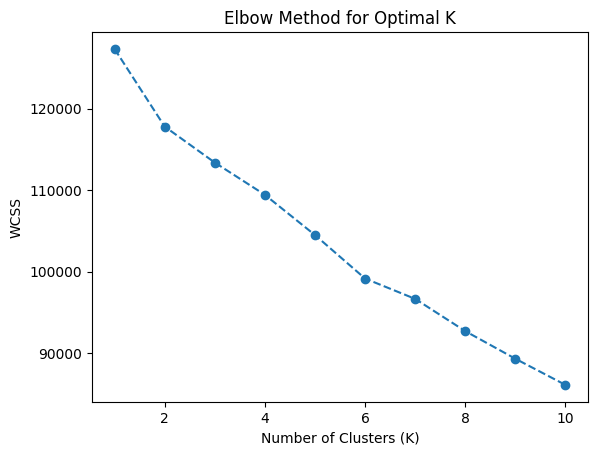

In [28]:
# try elbow method
 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[features])

In [30]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled.drop(columns=['cluster']))
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]
df_scaled['PCA3'] = pca_result[:, 2]

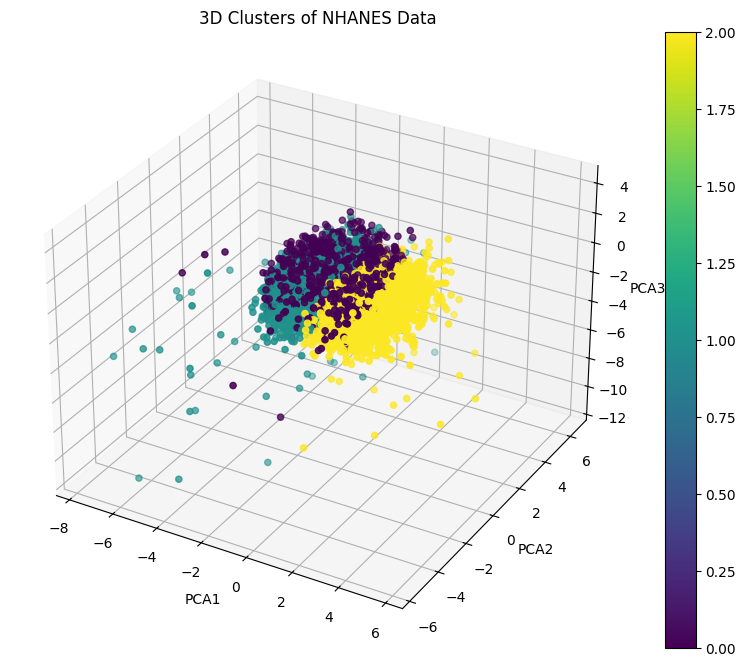

In [31]:
# Visualize Clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_scaled['PCA1'], df_scaled['PCA2'], df_scaled['PCA3'], c=df_scaled['cluster'], cmap='viridis')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("3D Clusters of NHANES Data")
plt.colorbar(sc)
plt.show()

# # Visualize Clusters in 2D
# plt.figure(figsize=(10, 8))
# plt.scatter(df_scaled['PCA1'], df_scaled['PCA2'], c=df_scaled['cluster'], cmap='viridis')
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
# plt.title("2D Clusters of NHANES Data")
# plt.colorbar()
# plt.show()

In [32]:
# get the silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled[features], df_scaled['cluster'])


np.float64(0.10202320162514317)

### Plot cluster to each diseases

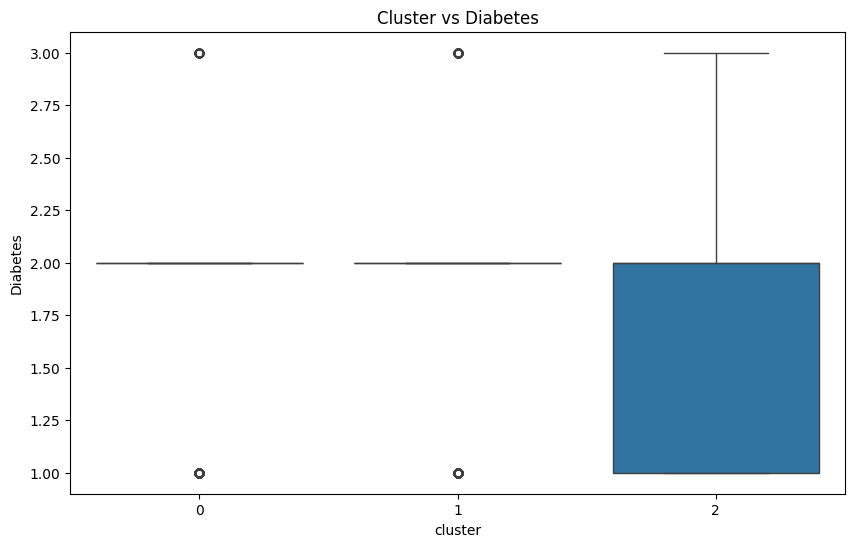

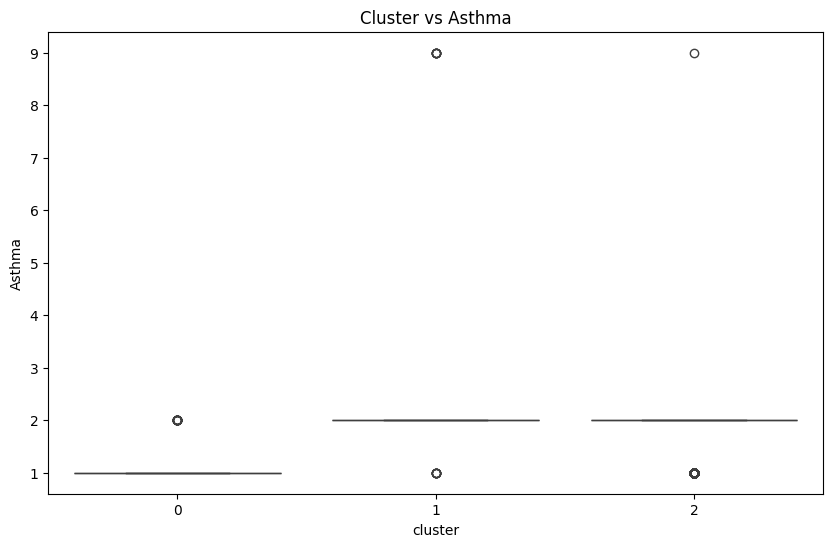

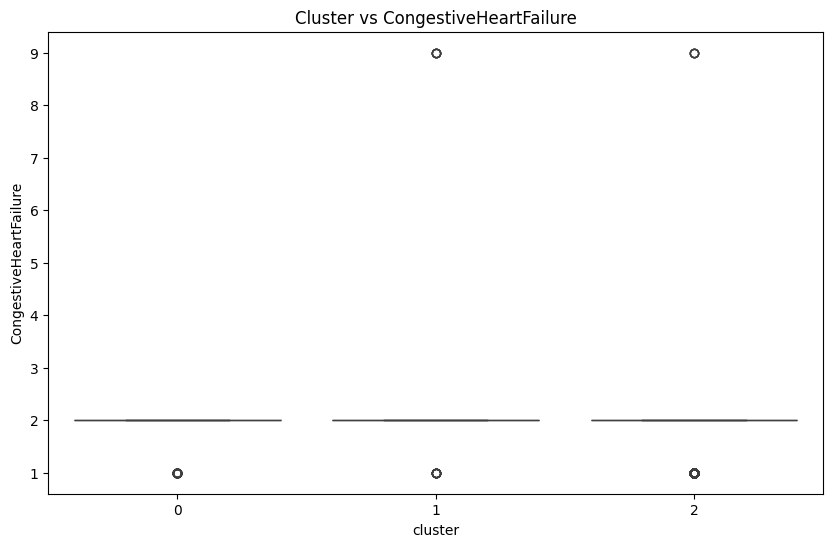

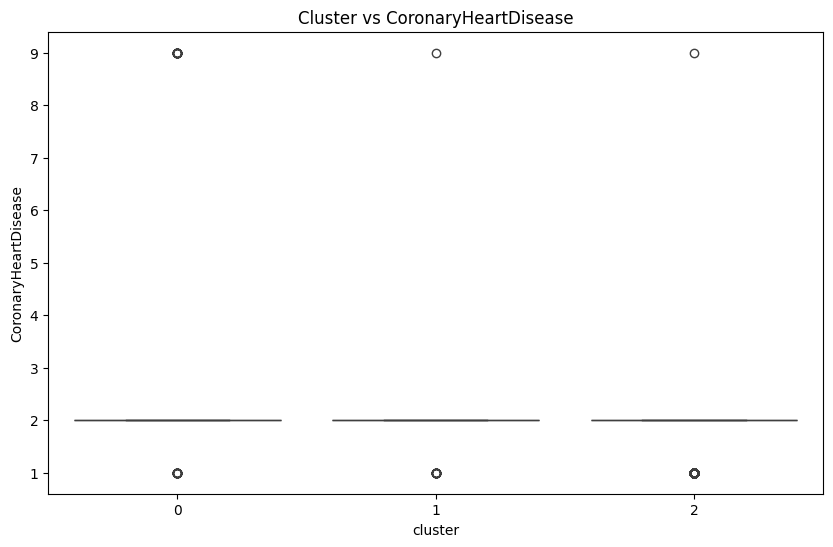

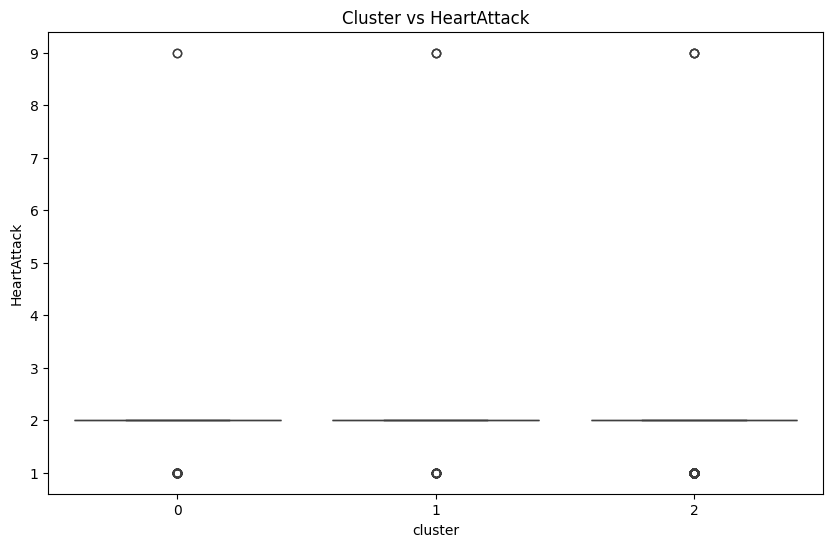

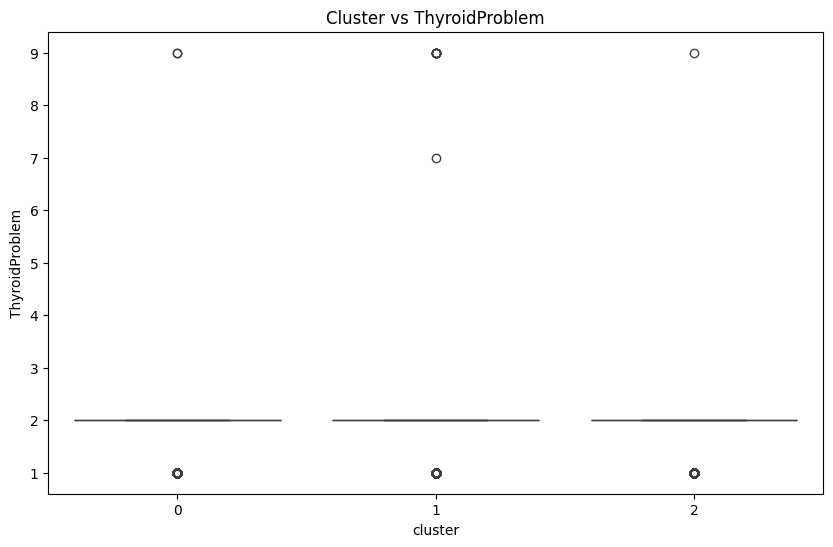

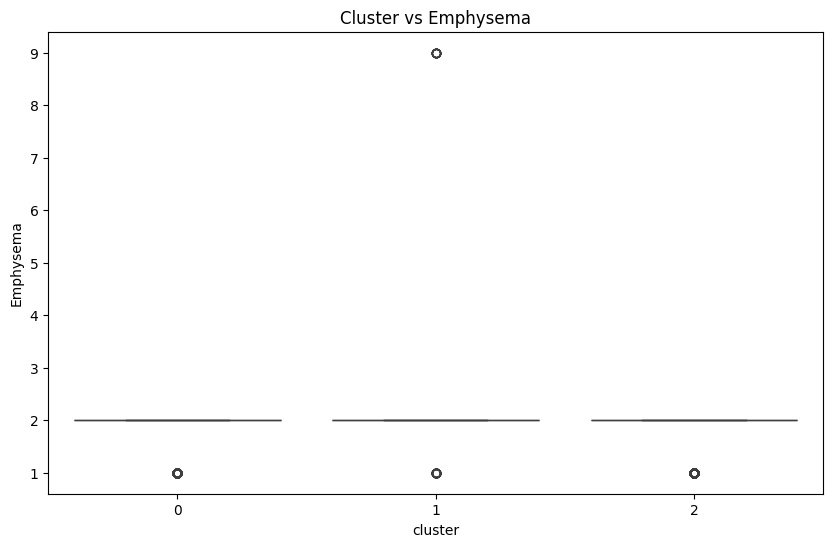

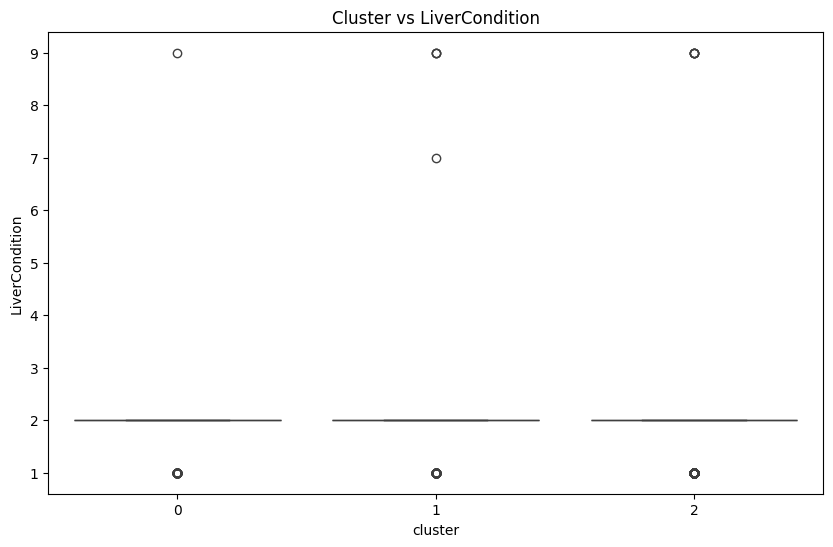

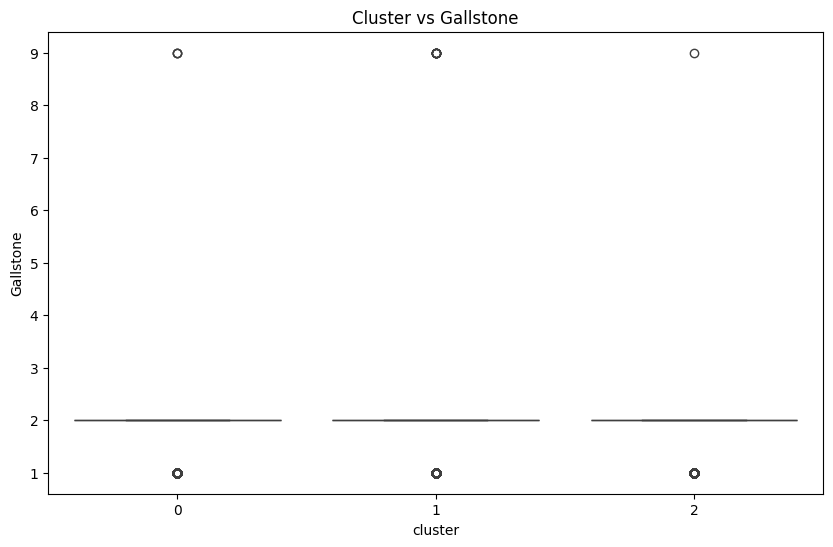

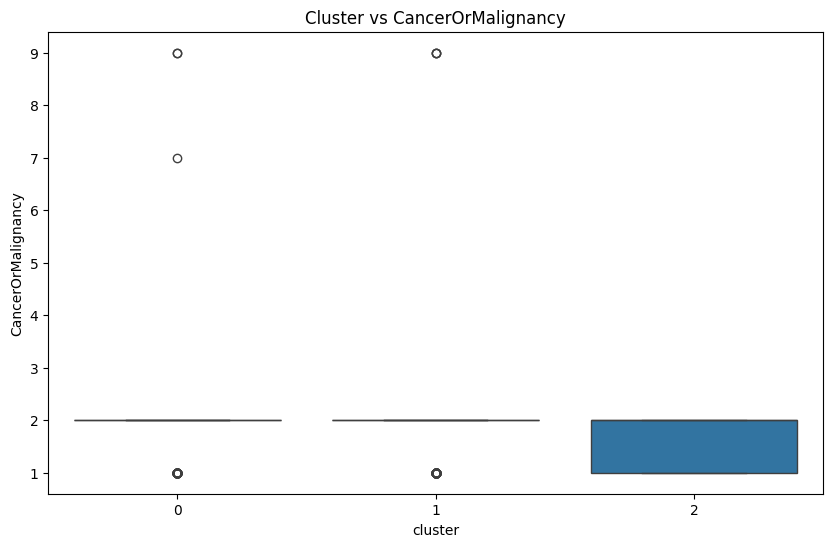

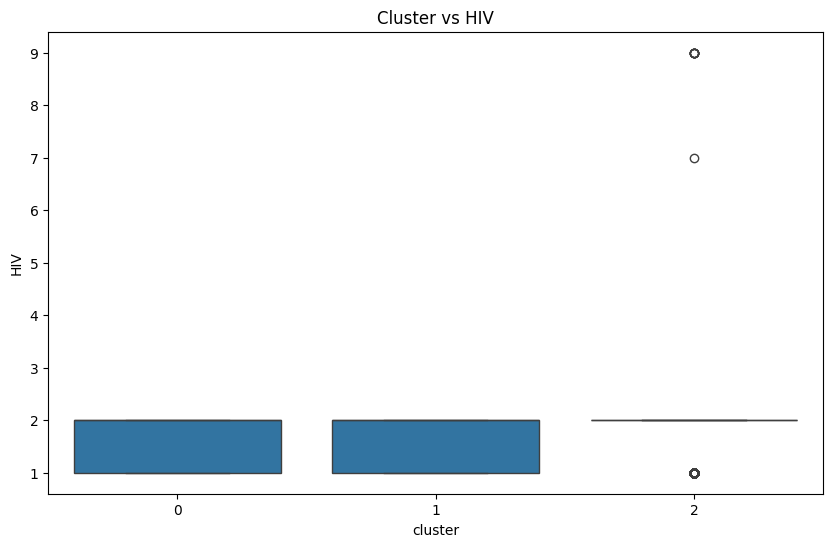

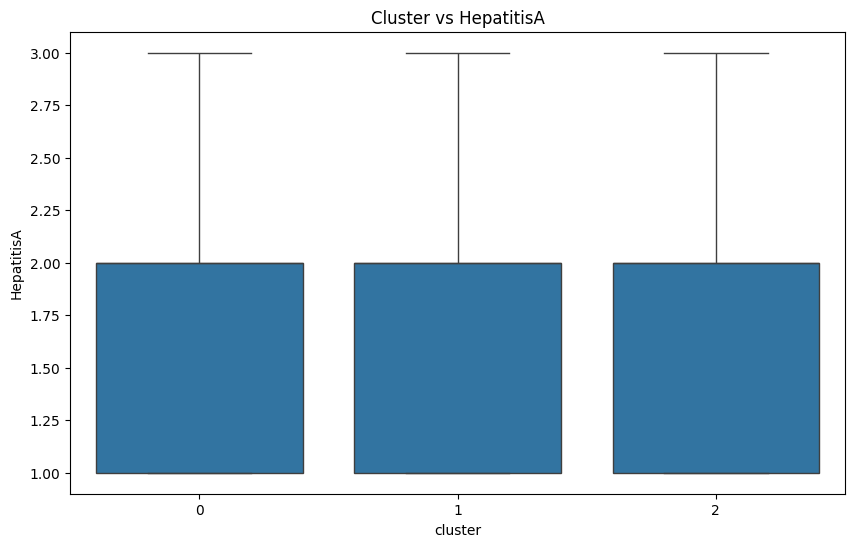

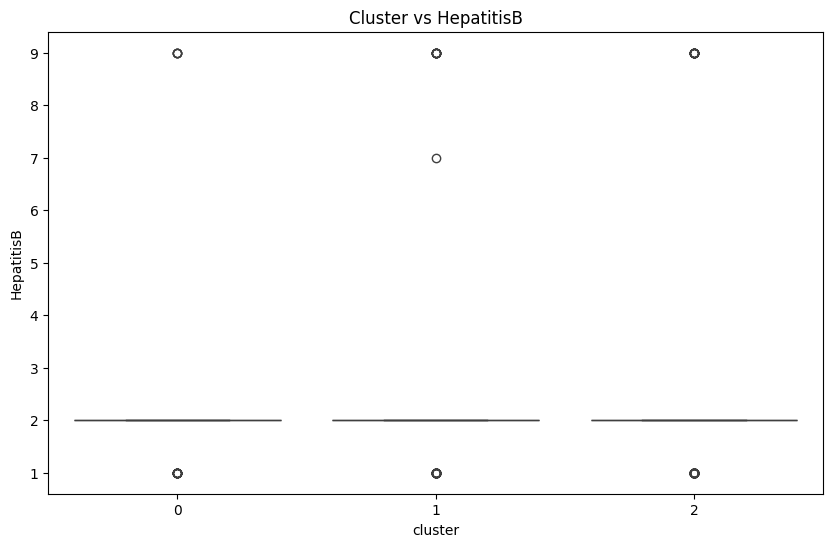

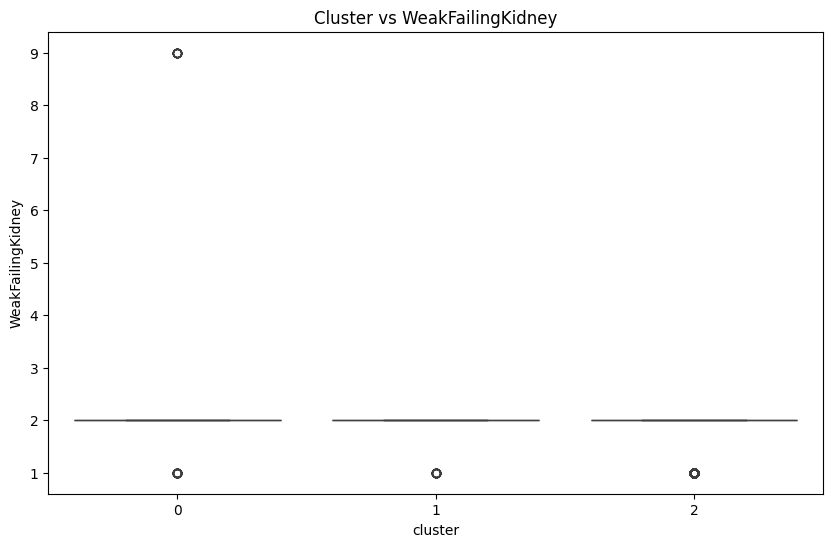

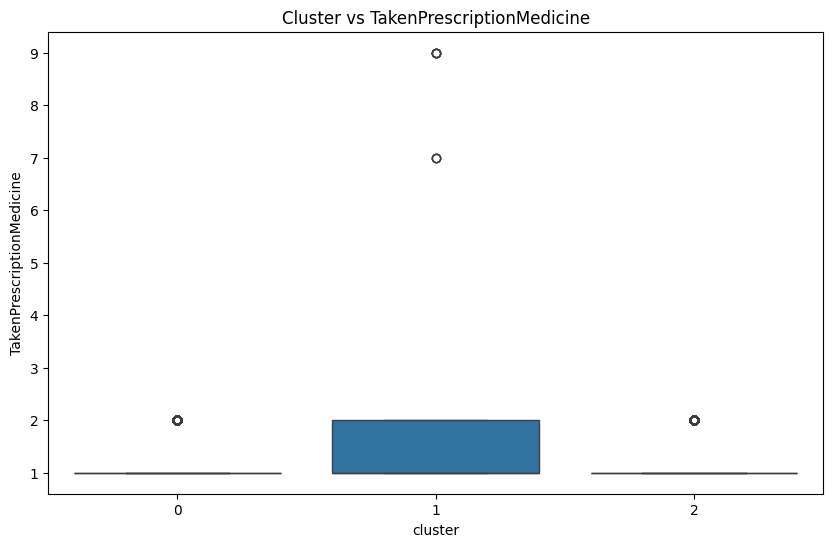

In [33]:
# plot each disease against the cluster

# Create a new DataFrame for plotting
df_plot = df_scaled[['cluster']].copy()

# Add disease columns to the plotting DataFrame
disease_columns = [
    'Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
    'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
    'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
    'TakenPrescriptionMedicine'
]

df_plot[disease_columns] = df[disease_columns]

# Plot each disease against the cluster
for disease in disease_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=disease, data=df_plot)
    plt.title(f'Cluster vs {disease}')
    plt.show()
